In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
train=pd.read_csv('linear_regression_train.csv')
test=pd.read_csv('linear_regression_test.csv')

In [80]:
train.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367


In [81]:
test.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,1,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,2,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,3,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,4,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,5,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917


In [82]:
train=train.drop(["ID"],axis=1)
test=test.drop(["ID"],axis=1)

In [83]:
train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,32.708495,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,3.507057,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,66.893460,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,7.199201,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,58.730086,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367


In [84]:
test.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,141.763723,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,39.500793,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,27.740454,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,9.448577,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,14.580324,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917


In [23]:
X=train.iloc[:,:-1].to_numpy()
y=train.iloc[:,-1].to_numpy().reshape(train.shape[0],1)

In [24]:
X_test=test.iloc[:,:-1].to_numpy()
y_test=test.iloc[:,-1].to_numpy().reshape(test.shape[0],1)

In [56]:
def norm_l(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    std[std==0]=1 
    x_scaled=(x-mean)/std
    return x_scaled

In [57]:
X=norm_l(X)
X,y

(array([[ 0.        ,  0.        , -1.69864257, ..., -0.22286562,
         -0.47196937,  2.27252813],
        [ 0.        ,  0.        ,  0.67201663, ...,  0.15226832,
          0.88583556, -0.21087511],
        [ 0.        ,  0.        ,  0.17740114, ..., -0.53771862,
         -0.41626433,  0.40224792],
        ...,
        [ 0.        ,  0.        ,  0.81704195, ..., -0.82105666,
         -1.01309748,  2.17589655],
        [ 0.        ,  0.        , -1.07691097, ...,  2.77345726,
          0.61758348, -0.31658482],
        [ 0.        ,  0.        , -0.21901717, ...,  0.228205  ,
         -2.83281419,  0.46684529]]),
 array([[ 5235.69092808],
        [-1221.44214589],
        [-1102.75886179],
        ...,
        [-1703.21936555],
        [ 4551.70684165],
        [-2800.86325604]]))

In [59]:
X=np.vstack((np.ones((X.shape[0],)),X.T)).T
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.22286562,
        -0.47196937,  2.27252813],
       [ 1.        ,  0.        ,  0.        , ...,  0.15226832,
         0.88583556, -0.21087511],
       [ 1.        ,  0.        ,  0.        , ..., -0.53771862,
        -0.41626433,  0.40224792],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.82105666,
        -1.01309748,  2.17589655],
       [ 1.        ,  0.        ,  0.        , ...,  2.77345726,
         0.61758348, -0.31658482],
       [ 1.        ,  0.        ,  0.        , ...,  0.228205  ,
        -2.83281419,  0.46684529]])

In [60]:
print(X.shape)
print(y.shape)

(48000, 28)
(48000, 1)


In [61]:
def model(x,y,learning_rate,iteration):
    m=y.size
    theta=np.zeros((x.shape[1],1))
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y))
        d_theta=(1/m)*np.dot(x.T,y_pred-y)
        theta=theta-learning_rate*d_theta
        cost_list.append(cost)
        if i%100==0:
            print(f"Iteration{i}: Cost={cost}")
       
    return theta,cost_list

In [62]:
X_scaled=norm_l(X)
iteration=1000
learning_rate=0.009
theta_final,cost_list=model(X,y,learning_rate=learning_rate,iteration=iteration)


Iteration0: Cost=3103250.636890892
Iteration100: Cost=562825.0391923035
Iteration200: Cost=141790.57388410537
Iteration300: Cost=71940.27890154607
Iteration400: Cost=60340.53042575008
Iteration500: Cost=58412.341248701174
Iteration600: Cost=58091.51998639295
Iteration700: Cost=58038.090447196395
Iteration800: Cost=58029.184144100785
Iteration900: Cost=58027.69819191751


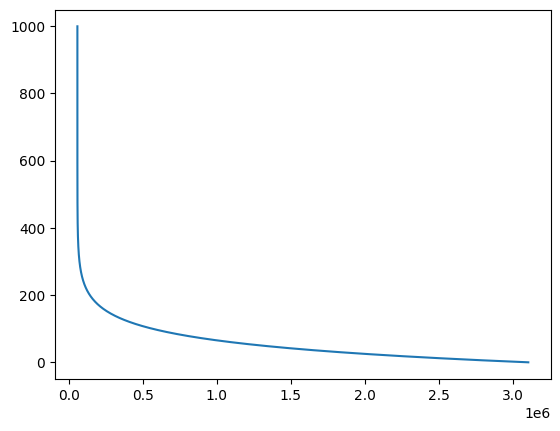

In [85]:
rng=np.arange(0,iteration)
plt.plot(cost_list,rng)
plt.show()

In [64]:
X_test_scaled=norm_l(X_test)

In [65]:
X_test_scaled

array([[-1.97837849e+00,  1.18957879e+00,  1.21509022e+00, ...,
         3.98578565e-01,  1.14979205e+00,  2.96607097e-01],
       [ 8.00824125e-01,  1.13374290e+00, -1.02510343e+00, ...,
        -4.57628496e-01, -1.91574770e-01,  7.39848321e-01],
       [-1.97421590e-02, -2.56490950e+00, -1.18184907e+00, ...,
        -1.27141765e+00, -1.35180564e+00, -1.81478789e-01],
       ...,
       [-1.21319079e+00, -1.44876427e+00,  3.38105347e-02, ...,
        -1.97344857e-01, -2.39698554e+00,  9.99369401e-01],
       [ 1.48863833e+00, -3.04328701e+00,  1.41428403e+00, ...,
         2.31940448e-01, -1.26575430e-01, -8.71643590e-01],
       [-1.50945651e-01,  1.31117712e+00,  5.15804967e-02, ...,
        -5.43538663e-01,  2.51254572e-01, -2.68407364e-03]])

In [86]:
X_test_scaled=np.vstack((np.ones((X_test_scaled.shape[0], )),X_test_scaled.T)).T

In [87]:
X_test_scaled

array([[ 1.        ,  1.        ,  1.        , ...,  0.39857857,
         1.14979205,  0.2966071 ],
       [ 1.        ,  1.        ,  1.        , ..., -0.4576285 ,
        -0.19157477,  0.73984832],
       [ 1.        ,  1.        ,  1.        , ..., -1.27141765,
        -1.35180564, -0.18147879],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.19734486,
        -2.39698554,  0.9993694 ],
       [ 1.        ,  1.        ,  1.        , ...,  0.23194045,
        -0.12657543, -0.87164359],
       [ 1.        ,  1.        ,  1.        , ..., -0.54353866,
         0.25125457, -0.00268407]])

In [89]:
y_pred=np.dot(X_test_scaled,theta_final)
error=(1/X.shape[0])*np.sum(np.abs(y_pred-y.T))

In [90]:
predicted_values=y_pred

In [95]:
predicted_values=pd.DataFrame(predicted_values)
pd.set_option('display.max_rows',None)


In [96]:
predicted_values

,0
0,2807.531985
1,743.438072
2,-985.311742
3,2177.326378
4,2688.463472
5,2672.449708
6,1763.879439
7,3554.931448
8,1210.040416
9,-2301.672684
